### <center>Universidad Sergio Arboleda
## <center> Inteligencia Artificial
# <center> Taller 5
### <center> Presentado por: Diego Bermúdez, Julián Cárdenas, Miguel Salazar y Daniel Velásquez

#Laboratorio 5: Regresión polinomial y regularización


##Punto 1

Se han entrenado cuatro modelos utilizando los mismos datos, pero diferentes hiperparámetros. La siguiente tabla presenta los resultados obtenidos.


 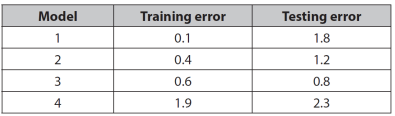

* ¿Cuál modelo seleccionaría?


El modelo más adecuado para seleccionar sería el modelo 3 pues se podría considerar como el modelo óptimo que se puede esperar, ya que, aunque tiene un error de entrenamiento de 0.6 también tiene un bajo error de prueba. Esto se puede decir que ese modelo no sufre de falta de datos de entrenamiento pues, puede generalizar de forma correcta el modelo para nuevas entradas de información en la parte de prueba. Esto lo logra sin caer en usar un grupo demasiado grande de entrenamiento o en el sobreprocesamiento de este. 
* ¿Cuál modelo parece tener underfitting?


Por inducción se puede determinar que el modelo 4 tiene underfitting pues se considera que el modelo es incapaz de capturar de forma adecuada la relación entre los datos de entrada y de salida dando un error de entrenamiento alto, reflejando que el modelo es muy simple necesitando ya sea más tiempo de entrenamiento, un grupo de entrenamiento más amplio o incluso una menor regularización. No es capaz de establecer una tendencia dominante con los datos, resultando en desempeño pobre del modelo, como se ve en el error de entrenamiento y dando pie a un alto error de prueba. 
Como es tan simple, no logra la generalización esperada, lo cual hace que los algoritmos de machine learning no sean capaces de hacer predicciones o de clasificar datos.
* ¿Cuál modelo parece tener overfitting?


Se puede determinar que el modelo 1 tiene overfitting pues su error de entrenamiento es muy cercano a cero, lo que refleja que está sobreentrenado y al momento de generalizar queda corto como lo demuestra la tasa de error de prueba al ser muy alto pues, el modelo sobreentrenado está muy específico y es incapaz de predecir datos nuevos. Por lo general, esto refleja que el modelo es demasiado complejo, dando como resultado un alto error de prueba. 

##Punto 2

El siguiente conjunto de datos 

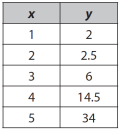

fue utilizado para entrenar un modelo de regresión polinomial que permite predecir los valores de 𝑦 como 𝑦̂, donde 𝑦̂ = 2x^2-5x+4. Si el parámetro de regularización es 𝜆 = 0.1 determine el valor del error del modelo para la regularización L1 y L2. Realice los cálculos de manera manual.

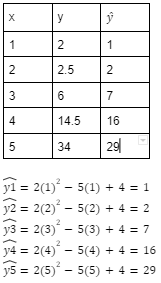

L1= Σ((y- ŷ)^2)= (2-1)^2+(2.5-2)^2+(6-7)^2+(14.5-16)^2+(34-29)^2=29.5


L2=Σ|y- ŷ|= |2-1|+|2.5-2|+|6-7|+|14.5-16|+|34-29|=9

##Punto 3

Una empresa encargada de fabricar elementos de seguridad para deportistas ha decidido realizar
experimentos que permitan evaluar los cambios de aceleración que sufre un ciclista durante un choque.
Esto servirá para analizar si los parámetros de construcción de los elementos de seguridad son los
adecuados. Los datos de los experimentos pueden encontrarse en [1]. Su objetivo es encontrar una función
que se ajuste a los datos utilizando regresión polinomial. Para esto:

### Importación de Bibliotecas y Herramientas Computacionales

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

###Cargue los datos en un DataFrame

In [26]:
path = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/position.csv'
df = pd.read_csv(path)
df.head()

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7


###Visualice el histograma de cada característica

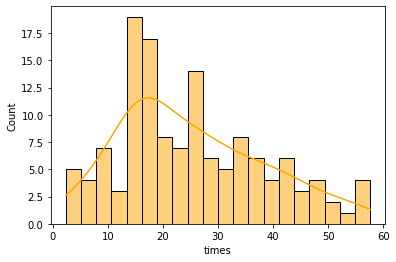

In [27]:
#@markdown Histograma de la columna 'Times'
sns.histplot(df['times'], bins=20, color='orange', kde=True)

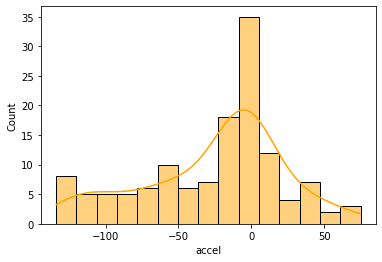

In [28]:
#@markdown Histograma de la columna 'Accel'
sns.histplot(df['accel'], bins=15, color='orange', kde=True)

### Genere un diagrama de dispersión utilizando tiempo en el eje x y la aceleración en el eje y

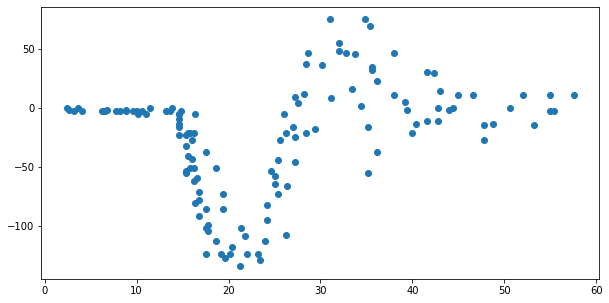

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(df['times'], df['accel'])

### De manera incremental genere modelos que intenten ajustar polinomios de grado 1, 2, 3, etc. hasta que los datos presenten un buen nivel de ajuste. Recuerde utilizar la clase PolynomialFeatures para generar nuevas características. El objetivo es encontrar el polinomio de menor grado que ajusta correctamente los datos.

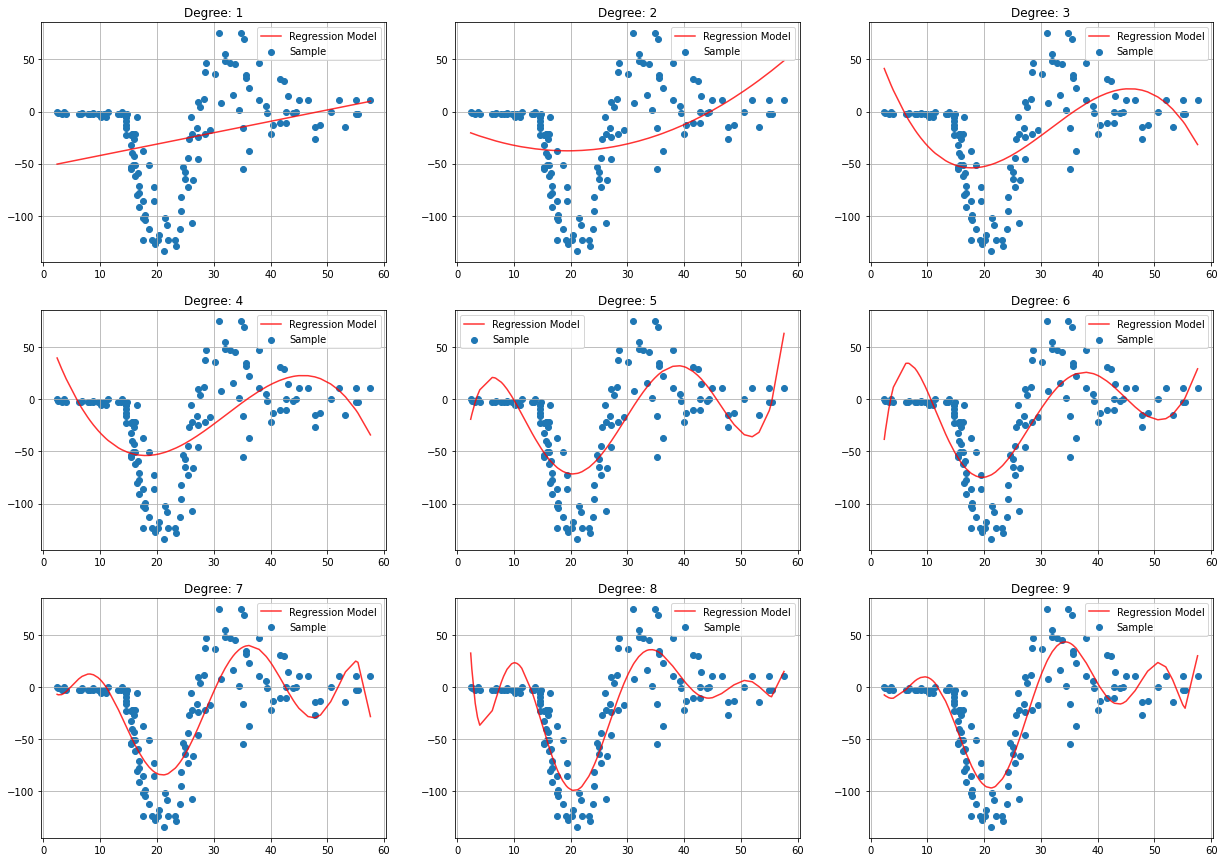

In [30]:
plt.figure(figsize=(21, 15))


X = np.array(df['times']).reshape(-1,1)
Y = np.array(df['accel']).reshape(-1,1)

pr = LinearRegression()
grados = [1,2,3,4,5,6,7,8,9]
y_pred = []
scores = []
i = 1

for grado in grados:
  polinomio = PolynomialFeatures(degree=grado, include_bias=False)
  X_pol = polinomio.fit_transform(X)
  pr.fit(X_pol, Y)
  y_pred = pr.predict(X_pol)
  plt.subplot(3, 3, i)
  plt.scatter(X, Y, label='Sample')
  plt.plot(X, y_pred, color='red', alpha= 0.8, label='Regression Model')
  scores.append(r2_score(Y, y_pred))
  plt.legend()
  plt.grid()
  i +=1
  plt.title(f'Degree: {grado}')

### Utilice alguna métrica de regresión para verificar la bondad del ajuste de todos los modelos generados y compárelos a través de un diagrama de barras

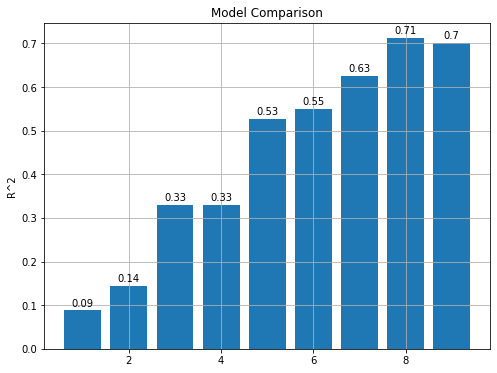

In [31]:
plt.figure(figsize=(8,6))
plt.bar(grados, scores)
plt.ylabel('R^2')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(grados, scores)

Analisis:
* Se utilizo la medida de R^2 score para determinar la bondad o la aptitud del modelo
* Recordemos que el  coeficiente de determinación está dado por una valoración entre 0 y 1. Donde se considera como el porcentaje de efectividad del modelo, por ejemplo, un valor de 0.8 implicaría el 80% de efectividad.
* Dada la grafica generada, se puede determinar que el modelo que mejor se ajusta es aquel con grado 8 polinomial con un coeficiente de 0.71, es decir del 71%
* El modelo que peor se ajusta es aquel con grado 1 polinomial, con un coeficiente de 0.09, es decir del 9%

## Punto 4

Utilizando los datos disponibles en [1] encuentre un modelo que se ajuste a los datos utilizando la regresión
de Lasso y la regresión de Ridge

In [32]:
from sklearn.linear_model import Ridge

In [33]:
from sklearn.linear_model import Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+05, tolerance: 3.082e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+05, tolerance: 3.082e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.43976e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist

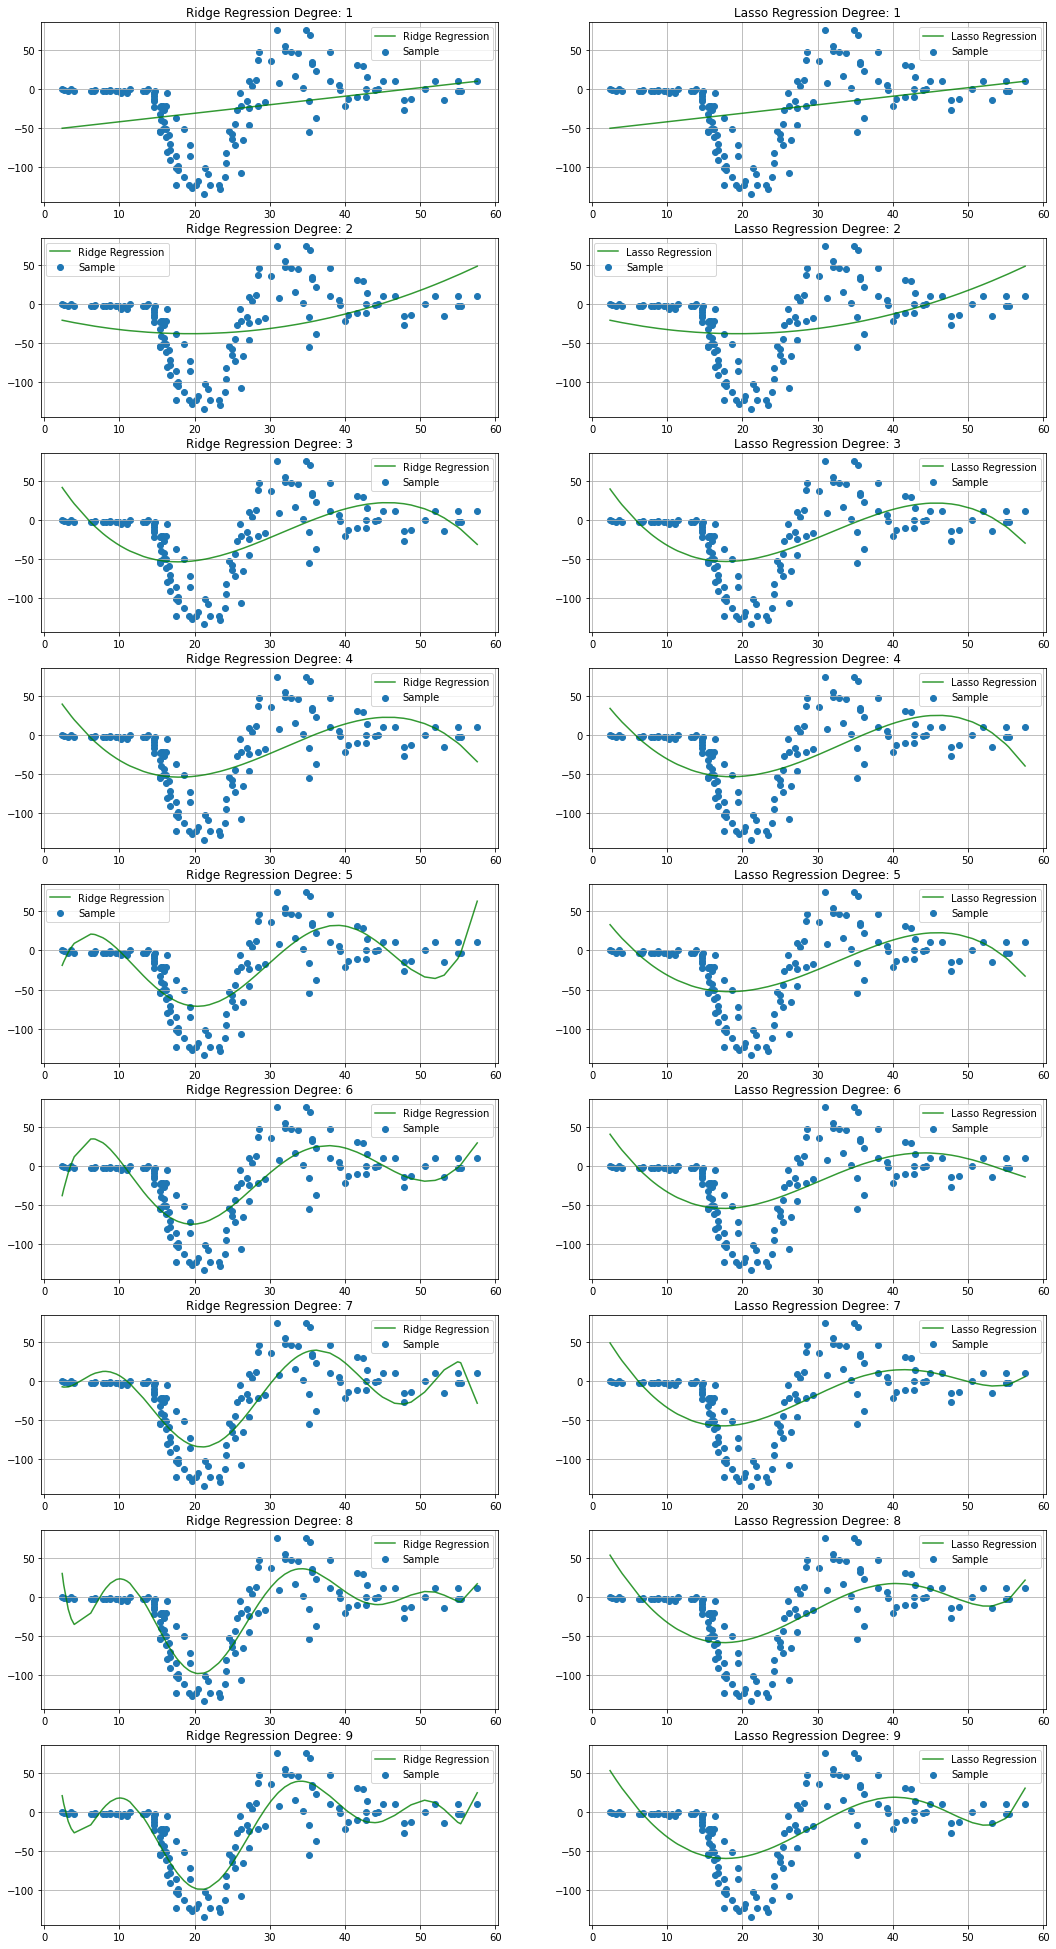

In [39]:
plt.figure(figsize=(18, 35))
i = 1
grados = [1,2,3,4,5,6,7,8,9]
ridge = Ridge(alpha=0.01)
lasso = Lasso(alpha=0.01, max_iter= 1500)

scores_ridge = []
scores_lasso = []

for grado in grados:
  polinomio = PolynomialFeatures(degree=grado, include_bias=False)
  X_pol = polinomio.fit_transform(X)
  ridge.fit(X_pol, Y)
  ridge_pred = ridge.predict(X_pol)
  lasso.fit(X_pol, Y)
  lasso_pred = lasso.predict(X_pol)
  
  scores_lasso.append(r2_score(Y, lasso_pred))
  scores_ridge.append(r2_score(Y, ridge_pred))

  plt.subplot(9, 2, i)
  plt.scatter(X, Y, label='Sample')
  plt.plot(X, ridge_pred, color='green', alpha= 0.8, label='Ridge Regression')
  plt.legend()
  plt.grid()
  plt.title(f'Ridge Regression Degree: {grado}')

  i+=1

  plt.subplot(9, 2, i)
  plt.scatter(X, Y, label='Sample')
  plt.plot(X, lasso_pred, color='green', alpha= 0.8, label='Lasso Regression')
  plt.legend()
  plt.grid()
  plt.title(f'Lasso Regression Degree: {grado}')
  i+=1

Observando los modelos generados por Ridge y Lasso se eligió el modelo de ridge grado 9



## Punto 5

Construya una gráfica que permita comparar los datos con el mejor modelo obtenido en el tercer punto y
los modelos obtenidos por Lasso y Ridge. Utilice alguna métrica de regresión para verificar la bondad del
ajuste de todos los modelos generados y compárelos a través de un diagrama de barras.

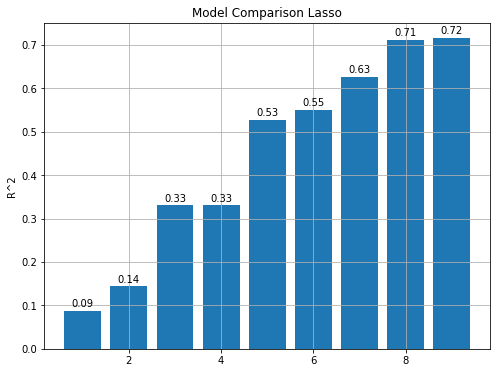

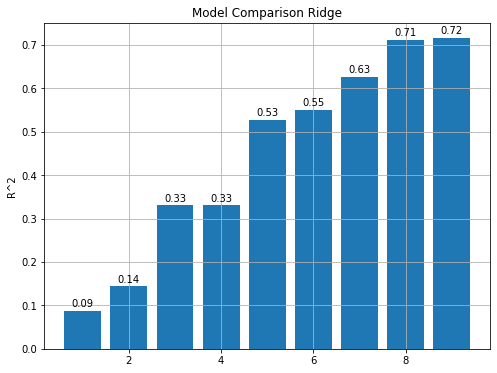

In [34]:
plt.figure(figsize=(8,6))
plt.bar(grados, scores_lasso)
plt.ylabel('R^2')
plt.title('Model Comparison Lasso')
plt.grid()

add_labels(grados, scores_lasso)


plt.figure(figsize=(8,6))
plt.bar(grados, scores_ridge)
plt.ylabel('R^2')
plt.title('Model Comparison Ridge')
plt.grid()

add_labels(grados, scores_ridge)

Analisis:
* Se utilizo la medida de R^2 score para determinar la bondad o la aptitud del modelo
* Recordemos que el  coeficiente de determinación está dado por una valoración entre 0 y 1. Donde se considera como el porcentaje de efectividad del modelo, por ejemplo, un valor de 0.8 implicaría el 80% de efectividad.
<br>
<b>Lasso</b>
* Dada la grafica generada, se puede determinar que el modelo Lasso que mejor se ajusta es aquel con grado 9 polinomial con un coeficiente de 0.39, es decir del 39%
* El modelo Lasso que peor se ajusta es aquel con grado 1 polinomial, con un coeficiente de 0.09, es decir del 9%
<br>
<b>Ridge</b>
* Dada la grafica generada, se puede determinar que el modelo Lasso que mejor se ajusta es aquel con grado 9 polinomial con un coeficiente de 0.72, es decir del 72%
* El modelo Lasso que peor se ajusta es aquel con grado 1 polinomial, con un coeficiente de 0.09, es decir del 9%

#Comparacion del mejor modelo del tercer punto(LinearRegression), Lasso y Ridge

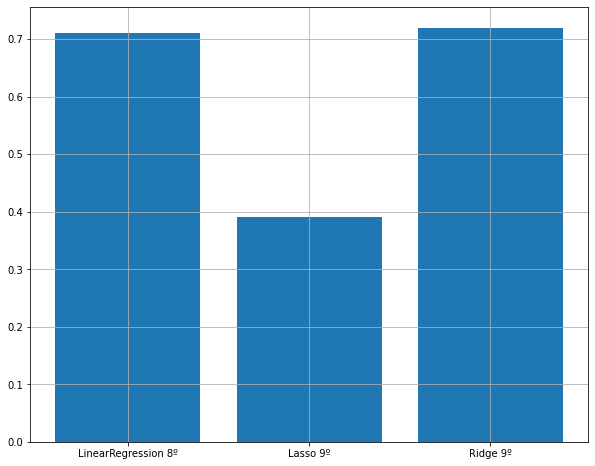

In [35]:
comparacion_x = np.array(["LinearRegression 8º", "Lasso 9º", "Ridge 9º"])
comparacion_y = np.array([0.71, 0.39, 0.72])
plt.figure(figsize=(10,8))
plt.bar(comparacion_x, comparacion_y)
plt.grid()
plt.show()

Analisis:
* Se utilizo la medida de R^2 score para determinar la bondad o la aptitud del modelo
* Se determino que el mejor modelo es Ridge de 9º con un coeficiente de 72%, luego le sigue LinerarRegression de 8º con 71% y finalmente Lasso 9º con 39%